In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

from astropy.coordinates import ICRS, SkyCoord
from astropy import units as u

virgo_redshift = 0.0036 # from NED
dist_mod = 5.*np.log10(virgo_redshift*3.e5/70.*1.e6)-5

//anaconda/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)

In [3]:
# select galaxies near Virgo
raflag = (nsa.RA > 120.) & (nsa.RA < 240.) 
decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
velflag = (nsa.Z*3.e5 > 1000.) & (nsa.Z*3.e5 < 3000.)
vflag = raflag & decflag & velflag
vra=187.69708
vdec=12.33694
rad_distance = np.sqrt((nsa.RA - vra)**2+(nsa.DEC-vdec)**2)

In [17]:
cofile = 'tables/Jablonka-MasterFile-2017Mar23.fits'
co = fits.getdata(cofile)

In [18]:
co.DEC

array([ 41.70980453,  43.41227722,  43.24294281,  39.58077621,
        39.55760956,  40.21324921,  46.26239014,  46.67213821,
        46.49991608,  46.92716599,  36.80008316,  38.20091629,
        28.31641579,  21.04997253,  22.82977867,  42.99388885,
        35.19219589,  39.7155571 ,  33.1174736 ,  38.52027893,
        40.36388779,  24.09499931,  26.98072243,  28.9386673 ,
        27.73413849,  33.49083328,  39.98477936,  41.36622238,
        39.98511124,  29.16436195,  38.18252945,  41.71258163,
        29.65419388,  23.30636024,  22.91550064,  41.50338745,
        43.87233353,  40.46175003,  39.57485962,  35.38683319,
        41.31352615,  39.68724823,  39.49766541,  39.70677948,
        40.2773056 ,  41.84624863,  40.33866501,  40.28302765,
        46.59164047,  46.67077637,  36.69797134,  33.50772095,
        35.32836151,  35.41400146,  29.51105499,  39.8769455 ,
        25.66111183,  32.63358307,  33.80580521,  31.90913963,
        38.56302643,  38.76219559,  31.93119431,  26.74

In [19]:
nsacat = SkyCoord(nsa.RA*u.degree,nsa.DEC*u.degree,frame='icrs')
COcat = SkyCoord(co['ra']*u.degree,co['dec']*u.degree,frame='icrs')

# match CO catalog to NSA
#index,dist2d,dist3d = nsacat.match_to_catalog_sky(COcat)

In [20]:
co.RA

array([ 207.18817139,  207.16246033,  208.04078674,  208.25787354,
        208.10362244,  207.85571289,  202.20733643,  202.04187012,
        202.14021301,  202.13829041,  210.3500824 ,  209.98786926,
        200.73529053,  197.14279175,  198.17408752,  205.12995911,
        206.11833191,  208.49787903,  204.60496521,  210.10417175,
        208.33999634,  198.02783203,  200.73170471,  193.66925049,
        196.44821167,  208.32429504,  207.43475342,  207.58491516,
        207.2336731 ,  209.2333374 ,  209.96217346,  206.32991028,
        194.45808411,  200.75358582,  197.90432739,  206.2862854 ,
        206.59861755,  208.91641235,  207.71124268,  198.62745667,
        208.72207642,  208.09596252,  207.26895142,  207.68070984,
        208.50170898,  209.27070618,  208.43983459,  208.36120605,
        202.10528564,  202.54750061,  173.00996399,  173.37562561,
        173.1645813 ,  172.22549438,  172.00250244,  170.63121033,
        172.04579163,  173.43333435,  174.68371582,  174.92707

In [21]:
# match CO catalog to NSA
index,dist2d,dist3d = nsacat.match_to_catalog_sky(COcat)

In [22]:
# only keep matches with matched RA and Dec w/in 10 arcsec
COflag = dist2d.degree < 10./3600# keep sources with matches w/in 10 arcsec
matchedCO10=np.zeros(len(nsa),dtype=co.dtype)
matchedCO10[COflag] = co[index[COflag]]

co_flag = matchedCO10['CO_DETECT'] == 1


filament = matchedCO10['filament'] != ''
print sum(co_flag),sum(filament)

117 194


## Plot Galaxies with CO, Halpha Sources ##

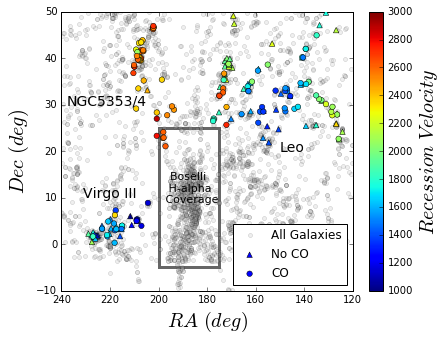

In [24]:
# color coded by recession velocity
fig=plt.figure(figsize=(6,5))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.7',markersize=4,alpha=0.2, label='All Galaxies')
plt.scatter(nsa.RA[filament & ~co_flag],nsa.DEC[filament & ~co_flag],c=nsa.Z[filament & ~co_flag]*3.e5,marker='^',zorder=20,s=30,vmin=1000,vmax=3000,lw=0.5,label='No CO')

plt.scatter(nsa.RA[co_flag],nsa.DEC[co_flag],c=nsa.Z[co_flag]*3.e5,zorder=20,s=30,vmin=1000,vmax=3000,lw=0.5,label='CO')

# plot CO sources
# plt.plot(nsa.RA[co_flag],nsa.DEC[co_flag],'go',mec='k',mfc='None',markersize=14)


plt.legend(numpoints=1,scatterpoints=1,loc='lower right')
# EVCC rectangle
ra_min=175
dec_min=-5
dra=25
ddec=30
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
plt.text(187,12,'Boselli \n H-alpha \n Coverage',fontsize=11,color='k',horizontalalignment='center',verticalalignment='center')
#plt.arrow(180, -7, -5., 5, head_width=1, head_length=1, fc='k', ec='k')
#cb=plt.colorbar(fraction=.08)
#plt.gca().annotate("", xy=(185, -1.5), xytext=(180, -7),arrowprops=dict(arrowstyle="->"))
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.text(205,30,'NGC5353/4',fontsize=14,horizontalalignment='right')
#plt.text(200,45,'Canes Venatici',fontsize=14,horizontalalignment='left')
plt.text(220,10,'Virgo III',fontsize=14,horizontalalignment='center')
plt.text(150,20,'Leo',fontsize=14,horizontalalignment='left')
plt.axis([120,240,-10,50])
plt.gca().invert_xaxis()
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.savefig('plots/filaments-for-issi-prop.pdf')